In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob

trafficdata=pd.read_csv('C:/python/Data3/trafficspeed.csv')
trafficdata.head()

,Year,Month,Vehicle Type,Time Period (AM/PM),Area Type,Functional Classification,Speed
0,2019,Jan,Passenger,AM,Urban,1,54.5
1,2019,Jan,Passenger,AM,Urban,2,49.6
2,2019,Jan,Passenger,AM,Urban,3,27.5
3,2019,Jan,Passenger,AM,Urban,4,24.9
4,2019,Jan,Passenger,AM,Urban,5,19.8


#### how does month affect traffic speed


In [5]:
trafficdata.isnull().sum()

Year                          0
Month                         0
Vehicle Type                  0
Time Period (AM/PM)           0
Area Type                     0
Functional Classification     0
Speed                        17
dtype: int64

In [6]:
#cleaning the data
trafficdata=trafficdata.dropna()

In [7]:
trafficdata.isnull().sum()##removed the all the 17rows of empty data

Year                         0
Month                        0
Vehicle Type                 0
Time Period (AM/PM)          0
Area Type                    0
Functional Classification    0
Speed                        0
dtype: int64

In [8]:
monthspeeddata=trafficdata[['Month','Speed']]
monthspeeddata.head()
monthspeeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 3555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   3539 non-null   object 
 1   Speed   3539 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.9+ KB


In [9]:
totalmonthspeed=monthspeeddata.groupby('Month').sum('Speed')
totalmonthspeed.head(12).sort_values('Speed')

,Speed
Month,
Feb,11140.2
Mar,11345.1
May,11373.5
Jan,11429.4
Apr,11525.6
Sep,12202.8
Nov,12314.4
Dec,12335.7
Oct,12355.2


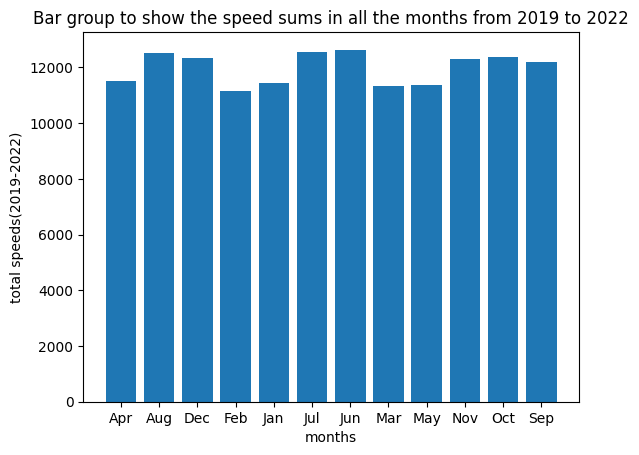

In [10]:
months=[month for month, df in trafficdata.groupby('Month')]
plt.bar(months,totalmonthspeed['Speed'])
plt.xlabel('months')
plt.ylabel('total speeds(2019-2022)')
plt.title('Bar group to show the speed sums in all the months from 2019 to 2022')
plt.show()

In [11]:
##Ssplit the data according to the year
traffic2019=trafficdata.loc[trafficdata['Year']==2019]
traffic2019.tail()


,Year,Month,Vehicle Type,Time Period (AM/PM),Area Type,Functional Classification,Speed
666,2019,Dec,Freight,PM,Rural,2,60.5
667,2019,Dec,Freight,PM,Rural,3,54.1
668,2019,Dec,Freight,PM,Rural,4,49.4
669,2019,Dec,Freight,PM,Rural,5,42.8
671,2019,Dec,Freight,PM,Rural,7,36.0


In [12]:
#to confirm that it has only extracted data for 2019
traffic2019['Year'].unique()

array([2019], dtype=int64)

In [13]:
#the same for the year 2020 to 2022
traffic2020=trafficdata.loc[trafficdata['Year']==2020]
traffic2021=trafficdata.loc[trafficdata['Year']==2021]
traffic2022=trafficdata.loc[trafficdata['Year']==2022]

#### correlation between functional classification and speed

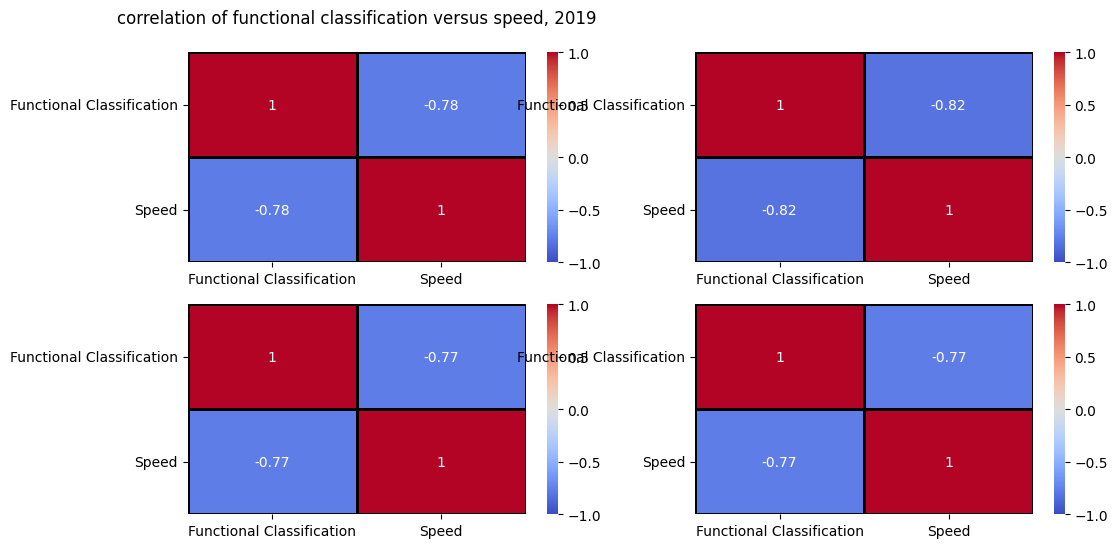

In [14]:
import seaborn as sns

#find the correlation
traffic2019corr=traffic2019.drop(['Year'],axis=1).corr(method='pearson',numeric_only=True)
traffic2020corr=traffic2020.drop(['Year'],axis=1).corr(method='pearson',numeric_only=True)
traffic2021corr=traffic2021.drop(['Year'],axis=1).corr(method='pearson',numeric_only=True)
traffic2022corr=traffic2022.drop(['Year'],axis=1).corr(method='pearson',numeric_only=True)


plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
traffic2019corr=traffic2019.drop(['Year'],axis=1).corr(method='pearson',numeric_only=True)
traffic2019corr
heatmap=sns.heatmap(traffic2019corr, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=2,linecolor='black' ).set_title('2019')
plt.title('correlation of functional classification versus speed, 2019\n')

plt.subplot(2,2,2)
heatmap=sns.heatmap(traffic2020corr, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=2,linecolor='black' )

plt.subplot(2,2,3)
heatmap=sns.heatmap(traffic2021corr, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=2,linecolor='black' )

plt.subplot(2,2,4)
heatmap=sns.heatmap(traffic2022corr, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=2,linecolor='black' )

#### ploting the graphs

In [15]:
traffic2019.head()

,Year,Month,Vehicle Type,Time Period (AM/PM),Area Type,Functional Classification,Speed
0,2019,Jan,Passenger,AM,Urban,1,54.5
1,2019,Jan,Passenger,AM,Urban,2,49.6
2,2019,Jan,Passenger,AM,Urban,3,27.5
3,2019,Jan,Passenger,AM,Urban,4,24.9
4,2019,Jan,Passenger,AM,Urban,5,19.8


In [16]:
traffic2019['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

#### how does areatype affect traffic speed

In [17]:
traffic2019['Area Type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
traffic2019['Vehicle Type'].unique()

array(['Passenger', 'Freight'], dtype=object)

In [19]:
## new dataframe for each year with average speed of each month

traffic_rural2019=pd.unique(traffic2019[['Vehicle Type','Time Period (AM/PM)','Area Type']].values.ravel('k'))


In [20]:
traffic2019['Speed'].mean()

38.8609022556391

In [22]:
traffic2019.rename(columns={'Vehicle Type':'Vehicle'}, inplace=True)

C:\Users\ESTHER\AppData\Local\Temp\ipykernel_2736\4216879109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic2019.rename(columns={'Vehicle Type':'Vehicle'}, inplace=True)


In [24]:
trafficdata.rename(columns={'Vehicle Type':'Vehicle'}, inplace=True)
trafficdata.head()

,Year,Month,Vehicle,Time Period (AM/PM),Area Type,Functional Classification,Speed
0,2019,Jan,Passenger,AM,Urban,1,54.5
1,2019,Jan,Passenger,AM,Urban,2,49.6
2,2019,Jan,Passenger,AM,Urban,3,27.5
3,2019,Jan,Passenger,AM,Urban,4,24.9
4,2019,Jan,Passenger,AM,Urban,5,19.8


In [45]:
data19=traffic2019.drop(['Year','Functional Classification'],axis=1).groupby(['Month','Time Period (AM/PM)','Area Type','Vehicle'],as_index=False).mean()
data19.head(30)

,Month,Time Period (AM/PM),Area Type,Vehicle,Speed
0,Apr,AM,Rural,Freight,47.757143
1,Apr,AM,Rural,Passenger,49.828571
2,Apr,AM,Urban,Freight,30.814286
3,Apr,AM,Urban,Passenger,31.428571
4,Apr,PM,Rural,Freight,47.300000
5,Apr,PM,Rural,Passenger,49.542857
6,Apr,PM,Urban,Freight,29.828571
7,Apr,PM,Urban,Passenger,29.185714
8,Aug,AM,Rural,Freight,45.471429
9,Aug,AM,Rural,Passenger,47.328571


In [47]:
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                96 non-null     object 
 1   Time Period (AM/PM)  96 non-null     object 
 2   Area Type            96 non-null     object 
 3   Vehicle              96 non-null     object 
 4   Speed                96 non-null     float64
dtypes: float64(1), object(4)
memory usage: 3.9+ KB


In [40]:
data19.to_csv('data19.csv')

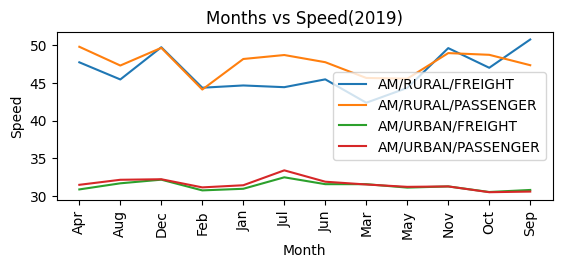

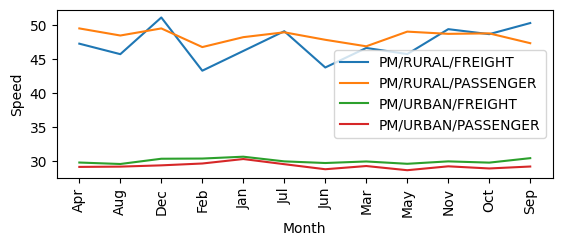

In [127]:
months=[Month for Month, df in data19.groupby('Month')]

##the y-axes are defined in the cells below

plt.subplot(2,1,1)
plt.plot(months,am_rural_freight,label='AM/RURAL/FREIGHT')
plt.plot(months,am_rural_passenger,label='AM/RURAL/PASSENGER')
plt.plot(months,am_urban_freight,label='AM/URBAN/FREIGHT')
plt.plot(months,am_urban_passenger,label='AM/URBAN/PASSENGER')

plt.xticks(months,rotation='vertical')
plt.title('Months vs Speed(2019)')
plt.xlabel('Month')
plt.ylabel('Speed')
plt.legend()
plt.show()

plt.subplot(2,1,2)

plt.plot(months,pm_rural_freight,label='PM/RURAL/FREIGHT')
plt.plot(months,pm_rural_passenger,label='PM/RURAL/PASSENGER')
plt.plot(months,pm_urban_freight,label='PM/URBAN/FREIGHT')
plt.plot(months,pm_urban_passenger,label='PM/URBAN/PASSENGER')
plt.xticks(months,rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Speed')
plt.legend()
plt.show()




In [97]:
data19.head()

,Month,Time,Area,Vehicle,Speed
0,Apr,AM,Rural,Freight,47.757143
1,Apr,AM,Rural,Passenger,49.828571
2,Apr,AM,Urban,Freight,30.814286
3,Apr,AM,Urban,Passenger,31.428571
4,Apr,PM,Rural,Freight,47.300000


In [110]:
data19.rename(columns={'Time Period (AM/PM)':'Time','Area Type':'Area'}, inplace=True)

am_rural_freight=data19.query("Time =='AM'& Area =='Rural'& Vehicle=='Freight'")['Speed']
am_urban_freight=data19.query("Time =='AM'& Area =='Urban'& Vehicle=='Freight'")['Speed']
am_urban_passenger=data19.query("Time =='AM'& Area =='Urban'& Vehicle=='Passenger'")['Speed']
am_rural_passenger=data19.query("Time =='AM'& Area =='Rural'& Vehicle=='Passenger'")['Speed']

pm_rural_freight=data19.query("Time =='PM'& Area =='Rural'& Vehicle=='Freight'")['Speed']
pm_rural_passenger=data19.query("Time =='PM'& Area =='Rural'& Vehicle=='Passenger'")['Speed']
pm_urban_freight=data19.query("Time =='PM'& Area =='Urban'& Vehicle=='Freight'")['Speed']
pm_urban_passenger=data19.query("Time =='PM'& Area =='Urban'& Vehicle=='Passenger'")['Speed']

In [88]:
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    96 non-null     object 
 1   Time     96 non-null     object 
 2   Area     96 non-null     object 
 3   Vehicle  96 non-null     object 
 4   Speed    96 non-null     float64
dtypes: float64(1), object(4)
memory usage: 3.9+ KB
